## Application of Machine Learning in Classifying Patient with Alzheimer’s Disease





- The aim of this project is to use features extracted from MRI images, together with additional data, retrieved from the Alzheimer’s Disease Neuroimaging Initiative (ADNI) database (http://adni.loni.ucla.edu/ and www.adni-info.org) to classify the healthy cognitive normal (CN) subjects and patients with Alzheimer's Disease (AD)


- These features come from a number of healthy cognitively normal (CN) subjects and patients with Alzheimer’s Disease (AD).

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#build model">Building Classification Model</a></li>
<li><a href="#model_imp">Model Improvement - Feature Selection and Hyperparameter Tuning</a></li>
<li><a href="#final model">Putting it all together</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

>This dataset contains information from 220 subjects based on features extracted from MRI images and additional data from Alzheimer's Disease Neuroimaging Initiative (ADNI) Database. These features come from a number of healthy cognitively normal (CN) subjects and patients with Alzheimer’s Disease (AD).
     

#### Data Dictionary

> - **RID:** Individual identifier
> - **BRAIN:** Whole Brain. A summary measure of total brain parenchyma, including the Cerebral-Cortex, Cerebellum-Cortex, Thalamus-Proper, CaudatePutamen, Pallidum, Hippocampus, Amygdala, Accumbens-area, VentralDC, Cerebral-White-Matter, Cerebellum-White-Matter, and WM-hypointensities. As such, it does not include ventricles or other CSF spaces, and is not intended to be used as a measure of intracranial volume.
> - **EICV:** Estimated Intracranial Volume, aka eTIV. To generate the mask, the baseline image is automatically segmented; all thus-defined brain and ventricular voxels are given the value 1 with all other voxels 0. This binary mask is then repeatedly smoothed with a Gaussian kernel to produce a simply connected uniform mask, covering all sulci, whose boundary tapers smoothly from 1 to 0 over the length of a few voxels. Ideally, the mask would end on the skull and include the brain stem down to where it starts to bend with the neck. The smoothing can be controlled fairly nicely to begin tapering at the skull, so that voxels with a mask value less than 1 can  be considered outside the ICV and therefore ignored.
> - **VENTRICLES:** Ventricles
> - **LHIPPOC:** Left Hippocampus
> - **RHIPPOC:** Right Hippocampus
> - **LINFLATVEN:** Left inferior lateral ventricle
> - **RINFLATVEN:** Right inferior lateral ventricle
> - **LMIDTEMP:** Left Middle Temporal
> - **RMIDTEMP:** Right Middle Temporal
> - **LINFTEMP:** Left Inferior Temporal
> - **RINFTEMP:** Right Inferior Temporal
> - **LFUSIFORM:** Left Fusiform
> - **RFUSIFORM:** Right Fusiform
> - **LENTORHIN:** Left Entorhinal
> - **RENTORHIN:** Right Entorhinal
> - **DXCURREN:** Diagnostic status: 0 implies negative (normal) and 1 implies positive (demented)

<a id='wrangling'></a>
## Data Wrangling

> In this section, we are going to gather the dataset to use for this project. The dataset is already provided and therefore will be loaded and cleaned accordingly.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset using pandas

data = pd.read_csv("DataTrain_CNvsAD.csv")
data.head()

RID    BRAIN     EICV  VENTRICLES  LHIPPOC  RHIPPOC  LINFLATVEN  \
0  1063   937159  1401690     38855.4  3427.13  3262.01    1045.280   
1   184   901429  1235930     10081.2  3410.35  3693.69     529.756   
2    16   935565  1345440     21299.0  3621.49  3802.43     887.978   
3   575   884775  1325760     69220.3  2802.91  3098.38    3215.570   
4   403  1062950  1498230     32967.7  3416.55  4103.49    1648.410   

   RINFLATVEN  LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  LFUSIFORM  RFUSIFORM  \
0    1263.010   2.44566   2.48342   2.47434   2.49197    2.27057    2.11083   
1     391.364   2.52101   2.69526   2.81781   2.76115    2.42640    2.50153   
2    1135.170   2.45128   2.53828   2.40015   2.46122    1.99782    2.40015   
3    3370.800   2.59348   2.62409   2.50552   2.95271    2.09972    2.12354   
4    1480.410   2.78544   2.76651   2.71469   2.54695    2.38363    2.48169   

   LENTORHIN  RENTORHIN  DXCURREN  
0    2.99752    3.24032         0  
1    3.40556    3.36431         0  
2    3.19497    3.02149         0  
3    2.43217    2.99445         0  
4    3.71762    3.86305         0

In [3]:
# check the number of features and samples

n_features = data.shape[1]
n_samples = data.shape[0]

print("no of features: ", n_features)
print("no of samples: ", n_samples)

no of features:  17
no of samples:  220


In [4]:
# exploring the data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         220 non-null    int64  
 1   BRAIN       220 non-null    int64  
 2   EICV        220 non-null    int64  
 3   VENTRICLES  220 non-null    float64
 4   LHIPPOC     220 non-null    float64
 5   RHIPPOC     220 non-null    float64
 6   LINFLATVEN  220 non-null    float64
 7   RINFLATVEN  220 non-null    float64
 8   LMIDTEMP    220 non-null    float64
 9   RMIDTEMP    220 non-null    float64
 10  LINFTEMP    220 non-null    float64
 11  RINFTEMP    220 non-null    float64
 12  LFUSIFORM   220 non-null    float64
 13  RFUSIFORM   220 non-null    float64
 14  LENTORHIN   220 non-null    float64
 15  RENTORHIN   220 non-null    float64
 16  DXCURREN    220 non-null    int64  
dtypes: float64(13), int64(4)
memory usage: 29.3 KB


As seen from the data information, there is no missing value.

In [5]:
# descriptive statistics of the data

data.describe()

RID         BRAIN          EICV     VENTRICLES      LHIPPOC  \
count   220.000000  2.200000e+02  2.200000e+02     220.000000   220.000000   
mean    697.381818  9.732298e+05  1.455089e+06   46819.713000  3147.849182   
std     410.637915  1.085988e+05  1.530882e+05   25260.106084   628.351722   
min       7.000000  6.345910e+05  1.059560e+06    7552.460000  1723.310000   
25%     373.500000  8.992745e+05  1.343640e+06   28324.100000  2673.720000   
50%     691.000000  9.744355e+05  1.454475e+06   42132.200000  3182.570000   
75%    1067.000000  1.044310e+06  1.565938e+06   59839.475000  3554.165000   
max    1430.000000  1.303590e+06  1.949090e+06  152927.000000  5514.940000   

           RHIPPOC   LINFLATVEN   RINFLATVEN    LMIDTEMP    RMIDTEMP  \
count   220.000000   220.000000   220.000000  220.000000  220.000000   
mean   3315.357955  1742.216973  1748.802286    2.391393    2.428251   
std     645.180948  1031.871538  1101.229703    0.278645    0.271520   
min    1768.950000   296.264000   318.735000    1.495310    1.707950   
25%    2751.300000  1001.204250   979.807500    2.216502    2.242237   
50%    3381.970000  1473.675000  1446.760000    2.430220    2.470915   
75%    3806.862500  2169.990000  2081.722500    2.601698    2.618500   
max    5750.400000  6082.040000  7210.340000    2.949880    3.010460   

         LINFTEMP    RINFTEMP   LFUSIFORM   RFUSIFORM   LENTORHIN   RENTORHIN  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     2.453312    2.439511    2.244598    2.235175    2.843245    2.943767   
std      0.262927    0.267990    0.256248    0.244546    0.533821    0.573245   
min      1.642300    1.677120    1.561400    1.497610    1.560000    1.498440   
25%      2.269475    2.269233    2.090515    2.097725    2.453882    2.526505   
50%      2.462075    2.461980    2.286395    2.231705    2.891995    3.025985   
75%      2.640270    2.627133    2.412992    2.399287    3.271362    3.375520   
max      3.048830    3.141290    2.839030    2.790480    3.783510    4.075010   

        DXCURREN  
count  220.00000  
mean     0.50000  
std      0.50114  
min      0.00000  
25%      0.00000  
50%      0.50000  
75%      1.00000  
max      1.00000

The descriptive statistics of the data shows that features are within the normal range

In [6]:
# count the number of subjects that are normal and those that are demented

data['DXCURREN'].value_counts()

0    110
1    110
Name: DXCURREN, dtype: int64

There are equal number of normal and demented subject. Hence, there is no need for augmenting the data.

In [7]:
# Check for duplicates in the dataset

sum(data.duplicated())

0

There are no duplicates in the data.

<a id='eda'></a>
## Exploratory Data Analysis

Let's do the exploratory analysis of the data to discover some interesting trends and insights

### BRAIN

In [8]:
# plot the distribution of whole brain matters using plotly

import plotly.express as px

fig = px.histogram(data,
                  x='BRAIN',
                  marginal='box',
                  title='Distribution of BRAIN matter')
fig.update_layout(bargap=0.1) # a boxplot to show the descriptive statistics of the distribution
fig.show()

### Relationship between the Features

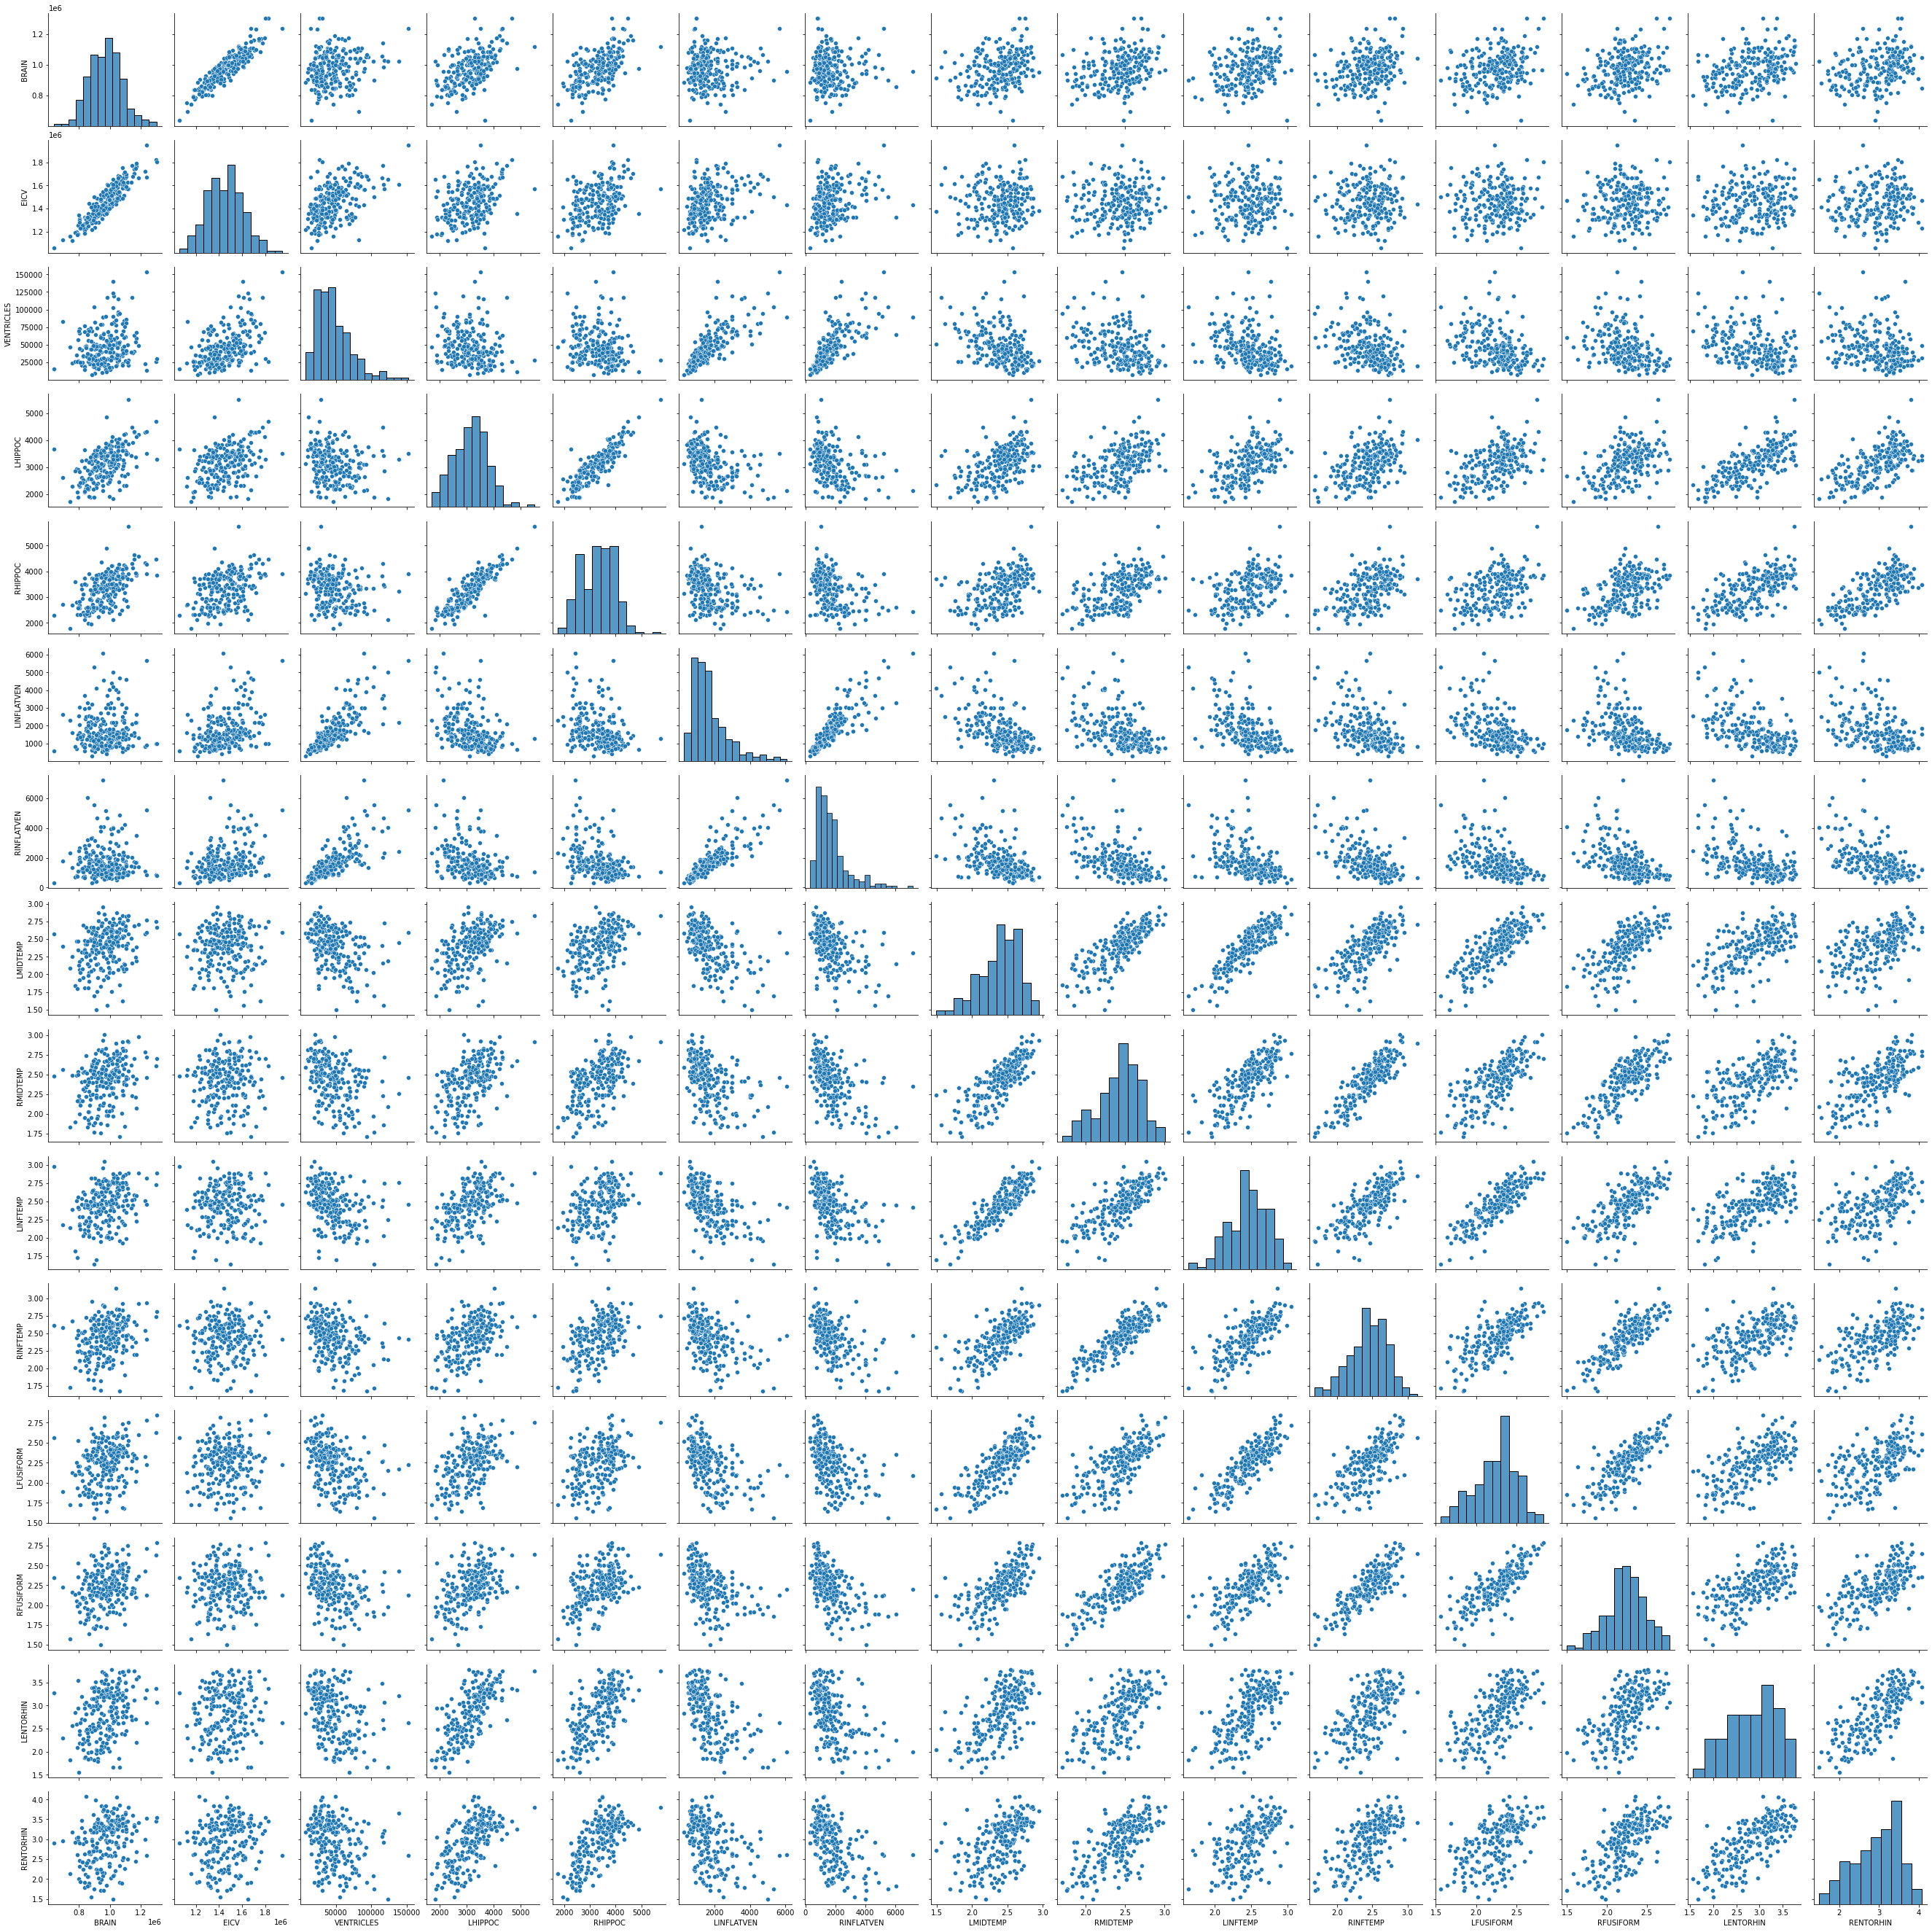

In [9]:
# explore the correlation between the features of the data using pairplot

cols = [col for col in data.columns[1:-1]] # exclude the individual identifier and diagnostic status from the columns
sns.pairplot(data[cols])

From the pairplots shown above, it can be seen that most of the features have relationship (poitive or negative) with one another. Let's examine a correlation table to obtain the strength of the relationship. 

In [10]:
# obtain the correlation coefficients between the features

data[cols].corr()

BRAIN      EICV  VENTRICLES   LHIPPOC   RHIPPOC  LINFLATVEN  \
BRAIN       1.000000  0.914554    0.173406  0.555175  0.593095    0.058577   
EICV        0.914554  1.000000    0.479153  0.388307  0.421946    0.332470   
VENTRICLES  0.173406  0.479153    1.000000 -0.182743 -0.178253    0.777208   
LHIPPOC     0.555175  0.388307   -0.182743  1.000000  0.882356   -0.390813   
RHIPPOC     0.593095  0.421946   -0.178253  0.882356  1.000000   -0.326846   
LINFLATVEN  0.058577  0.332470    0.777208 -0.390813 -0.326846    1.000000   
RINFLATVEN  0.005357  0.273800    0.717445 -0.358850 -0.402222    0.851397   
LMIDTEMP    0.289149  0.034902   -0.387530  0.506860  0.430293   -0.519734   
RMIDTEMP    0.302821  0.061162   -0.347546  0.515082  0.543717   -0.453266   
LINFTEMP    0.291468  0.058630   -0.330725  0.532376  0.436532   -0.529090   
RINFTEMP    0.283498  0.043293   -0.334839  0.480592  0.499915   -0.444729   
LFUSIFORM   0.299817  0.046025   -0.380378  0.519097  0.423725   -0.519430   
RFUSIFORM   0.312397  0.069940   -0.353161  0.471420  0.482206   -0.448445   
LENTORHIN   0.356856  0.139978   -0.342013  0.709872  0.649987   -0.535279   
RENTORHIN   0.322380  0.128261   -0.261059  0.619150  0.698551   -0.435775   

            RINFLATVEN  LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  LFUSIFORM  \
BRAIN         0.005357  0.289149  0.302821  0.291468  0.283498   0.299817   
EICV          0.273800  0.034902  0.061162  0.058630  0.043293   0.046025   
VENTRICLES    0.717445 -0.387530 -0.347546 -0.330725 -0.334839  -0.380378   
LHIPPOC      -0.358850  0.506860  0.515082  0.532376  0.480592   0.519097   
RHIPPOC      -0.402222  0.430293  0.543717  0.436532  0.499915   0.423725   
LINFLATVEN    0.851397 -0.519734 -0.453266 -0.529090 -0.444729  -0.519430   
RINFLATVEN    1.000000 -0.465602 -0.542264 -0.454759 -0.524645  -0.460305   
LMIDTEMP     -0.465602  1.000000  0.789518  0.871690  0.717138   0.803698   
RMIDTEMP     -0.542264  0.789518  1.000000  0.760003  0.874190   0.720606   
LINFTEMP     -0.454759  0.871690  0.760003  1.000000  0.747792   0.849473   
RINFTEMP     -0.524645  0.717138  0.874190  0.747792  1.000000   0.711103   
LFUSIFORM    -0.460305  0.803698  0.720606  0.849473  0.711103   1.000000   
RFUSIFORM    -0.511817  0.685172  0.791022  0.716489  0.821934   0.783992   
LENTORHIN    -0.500521  0.635703  0.644477  0.641197  0.583188   0.666928   
RENTORHIN    -0.532744  0.516767  0.667830  0.539837  0.644098   0.554094   

            RFUSIFORM  LENTORHIN  RENTORHIN  
BRAIN        0.312397   0.356856   0.322380  
EICV         0.069940   0.139978   0.128261  
VENTRICLES  -0.353161  -0.342013  -0.261059  
LHIPPOC      0.471420   0.709872   0.619150  
RHIPPOC      0.482206   0.649987   0.698551  
LINFLATVEN  -0.448445  -0.535279  -0.435775  
RINFLATVEN  -0.511817  -0.500521  -0.532744  
LMIDTEMP     0.685172   0.635703   0.516767  
RMIDTEMP     0.791022   0.644477   0.667830  
LINFTEMP     0.716489   0.641197   0.539837  
RINFTEMP     0.821934   0.583188   0.644098  
LFUSIFORM    0.783992   0.666928   0.554094  
RFUSIFORM    1.000000   0.619569   0.663658  
LENTORHIN    0.619569   1.000000   0.750612  
RENTORHIN    0.663658   0.750612   1.000000

We want to obtain the top correlated features (Positive and negative)

In [11]:
corr_feat = data[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values(ascending=False) # unstack the dataframe and sort values in descending order
pos_corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
pos_corr_feat.head(10)

BRAIN       BRAIN         1.000000
            EICV          0.914554
LHIPPOC     RHIPPOC       0.882356
RMIDTEMP    RINFTEMP      0.874190
LINFTEMP    LMIDTEMP      0.871690
LINFLATVEN  RINFLATVEN    0.851397
LINFTEMP    LFUSIFORM     0.849473
RFUSIFORM   RINFTEMP      0.821934
LMIDTEMP    LFUSIFORM     0.803698
RMIDTEMP    RFUSIFORM     0.791022
dtype: float64

It is indicated that **BRAIN and EICV** has the strongest positive correlation of **0.914554**

In [12]:
corr_feat = data[cols].corr() # get the correlation coefficients of all the features
corr_feat = corr_feat.unstack().sort_values() # unstack the dataframe and sort values in descending order
neg_corr_feat = corr_feat.drop_duplicates() # drop duplicates to exclude the same feature correlation
neg_corr_feat.head(10)

RMIDTEMP    RINFLATVEN   -0.542264
LENTORHIN   LINFLATVEN   -0.535279
RINFLATVEN  RENTORHIN    -0.532744
LINFTEMP    LINFLATVEN   -0.529090
RINFLATVEN  RINFTEMP     -0.524645
LINFLATVEN  LMIDTEMP     -0.519734
LFUSIFORM   LINFLATVEN   -0.519430
RINFLATVEN  RFUSIFORM    -0.511817
LENTORHIN   RINFLATVEN   -0.500521
LMIDTEMP    RINFLATVEN   -0.465602
dtype: float64

**RMIDTEMP and RINFLATVEN** shows the most fairly relationship of **-0.542264**

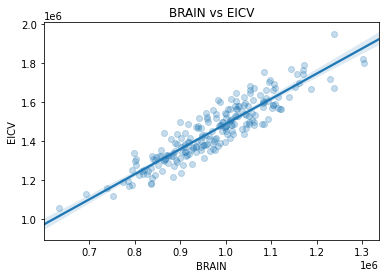

In [13]:
# relationship between BRAIN and EICV.. jitter and transparency applied
sns.regplot(data = data, x = 'BRAIN', y = 'EICV',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('BRAIN vs EICV');

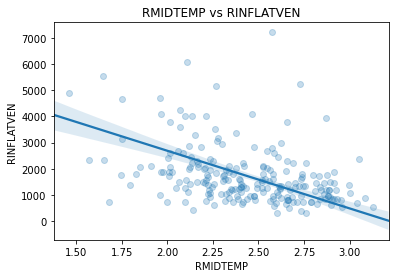

In [14]:
# relationship between RMIDTEMP and RINFLATVEN.. jitter and transparency applied
sns.regplot(data = data, x = 'RMIDTEMP', y = 'RINFLATVEN',
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})
plt.title('RMIDTEMP vs RINFLATVEN');

### Obtain the mean values of features for normal and demented subjects

In [15]:
# group by the diagnostic status and find the mean value of each feature

mean_df = data.drop(columns=['RID'], axis=1) # drop the RID (Individual identifier) from the data
mean_df = mean_df.groupby('DXCURREN').mean() # group by DXCURREN and ibtain the mean
mean_df

BRAIN          EICV    VENTRICLES      LHIPPOC      RHIPPOC  \
DXCURREN                                                                        
0         996334.936364  1.458788e+06  38110.280545  3533.095727  3678.580818   
1         950124.645455  1.451390e+06  55529.145455  2762.602636  2952.135091   

           LINFLATVEN   RINFLATVEN  LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  \
DXCURREN                                                                     
0         1234.750545  1244.294327  2.564385  2.598034  2.620976  2.588706   
1         2249.683400  2253.310245  2.218401  2.258468  2.285647  2.290316   

          LFUSIFORM  RFUSIFORM  LENTORHIN  RENTORHIN  
DXCURREN                                              
0          2.389659   2.365876   3.186655   3.298458  
1          2.099536   2.104474   2.499836   2.589077

Let's plot some of the mean values of the features to compare the features of normal healthy subjects and subjects with Alzheimer's disease.

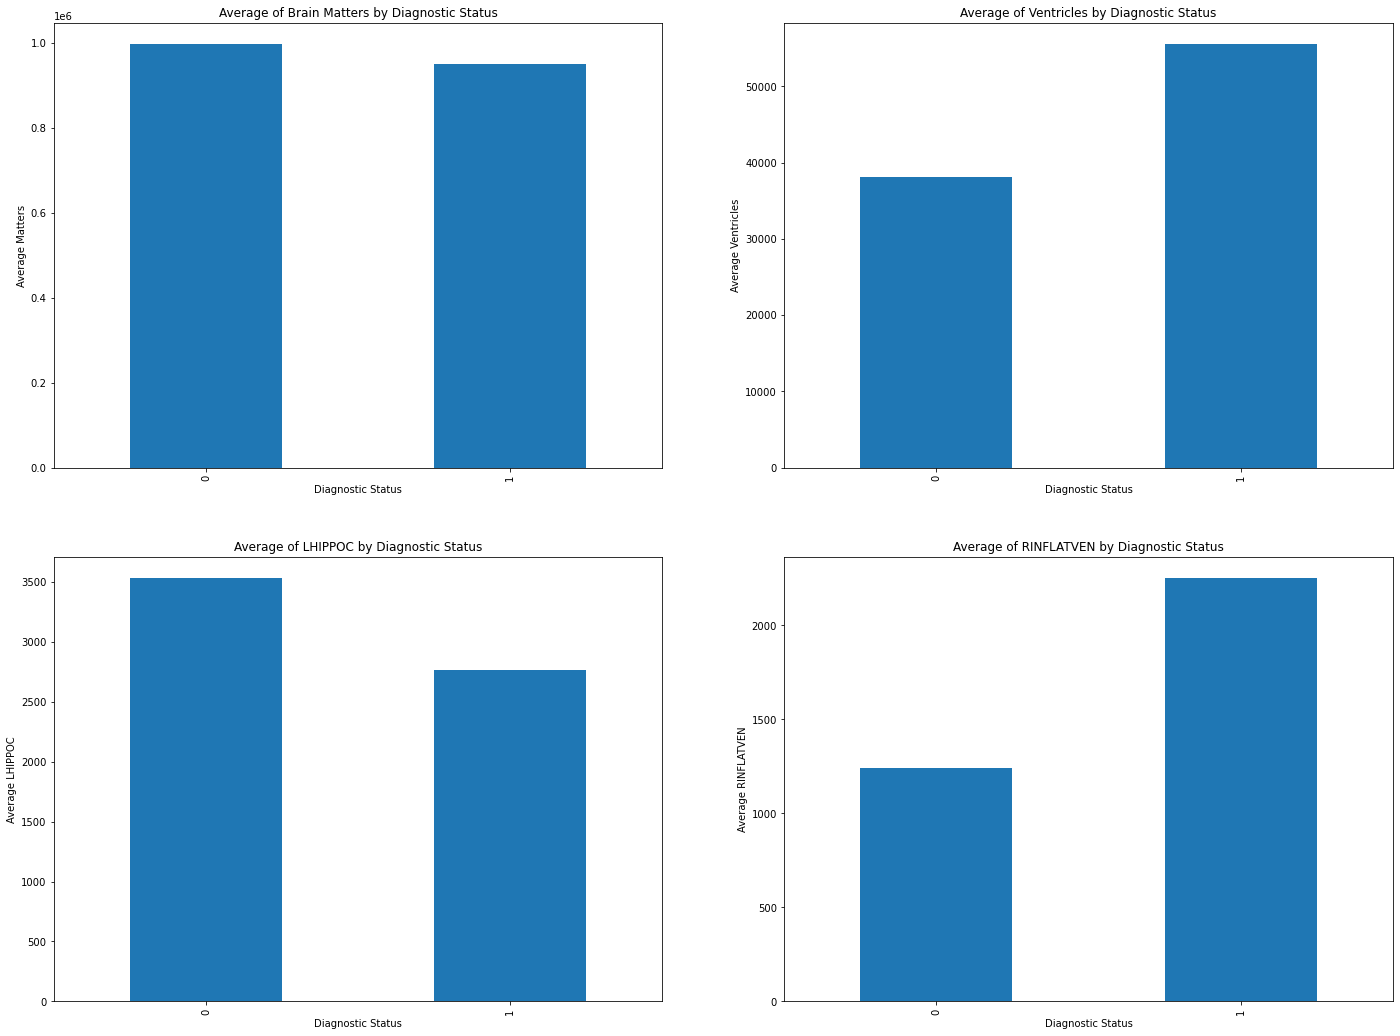

In [16]:
# set figure for the plots
plt.figure(figsize=[24, 18])

plt.subplot(2, 2, 1)
mean_df['BRAIN'].plot(kind='bar', title='Average of Brain Matters by Diagnostic Status',
               ylabel='Average Matters', xlabel='Diagnostic Status')

plt.subplot(2, 2, 2)
mean_df['VENTRICLES'].plot(kind='bar', title='Average of Ventricles by Diagnostic Status',
               ylabel='Average Ventricles', xlabel='Diagnostic Status')

plt.subplot(2, 2, 3)
mean_df['LHIPPOC'].plot(kind='bar', title='Average of LHIPPOC by Diagnostic Status',
               ylabel='Average LHIPPOC', xlabel='Diagnostic Status')

plt.subplot(2, 2, 4)
mean_df['RINFLATVEN'].plot(kind='bar', title='Average of RINFLATVEN by Diagnostic Status',
               ylabel='Average RINFLATVEN', xlabel='Diagnostic Status')

plt.show()

It can be deducted from the above graphs that the average brain matter volume is higher in normal healthy subjects than in patients with Alzheimer's disease. Also average Left Hippocampus is higher in CN subjects than in AD subjects. However, average ventricles and Right inferior lateral ventricle volume is higher in patients with Alzheimer's disease than in normal healthy subjects.

<a id='build model'></a>
## Building Classification Models

### Train-Test Split

The data will be divided into train and validation sets. The model will be trained and fit on train data and its accuracy will be determined. The essence of validation set is to determine how well our models fit on the data before exposing the model to a test set. Validation set will enable us to determine the best model as well as the best hyperparameters for tuning the model.

In [17]:
# drop extraneous columns from the data 

data = data.drop(columns=['RID'], axis=1)
data.head()

BRAIN     EICV  VENTRICLES  LHIPPOC  RHIPPOC  LINFLATVEN  RINFLATVEN  \
0   937159  1401690     38855.4  3427.13  3262.01    1045.280    1263.010   
1   901429  1235930     10081.2  3410.35  3693.69     529.756     391.364   
2   935565  1345440     21299.0  3621.49  3802.43     887.978    1135.170   
3   884775  1325760     69220.3  2802.91  3098.38    3215.570    3370.800   
4  1062950  1498230     32967.7  3416.55  4103.49    1648.410    1480.410   

   LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  LFUSIFORM  RFUSIFORM  LENTORHIN  \
0   2.44566   2.48342   2.47434   2.49197    2.27057    2.11083    2.99752   
1   2.52101   2.69526   2.81781   2.76115    2.42640    2.50153    3.40556   
2   2.45128   2.53828   2.40015   2.46122    1.99782    2.40015    3.19497   
3   2.59348   2.62409   2.50552   2.95271    2.09972    2.12354    2.43217   
4   2.78544   2.76651   2.71469   2.54695    2.38363    2.48169    3.71762   

   RENTORHIN  DXCURREN  
0    3.24032         0  
1    3.36431         0  
2    3.02149         0  
3    2.99445         0  
4    3.86305         0

In [18]:
# seperate data into X (input) and y (target)

input_cols = [col for col in data.columns[:-1]] # select the input columns

X = data[input_cols] # input data
y = data['DXCURREN'] # target

In [19]:
# splitting dataset into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=101)

In [20]:
# checking the train and validation data shape

print(X_train.shape)
print(X_val.shape)

(176, 15)
(44, 15)


In [21]:
print(y_train.shape)
print(y_val.shape)

(176,)
(44,)


### Feature Scaling/Data Normalization

- Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale. 
- This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model.
- For the purpose of this project, the data will be normalized using Standard Scaler

In [22]:
# import StandardScaler and scale the training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create an instance of the standard scaler object

X_train_scaled = scaler.fit_transform(X_train) # fit and transform scaler on training data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=input_cols)

X_train_scaled

BRAIN      EICV  VENTRICLES   LHIPPOC   RHIPPOC  LINFLATVEN  \
0    0.481074  0.760042    0.345224  0.058861 -0.450288   -0.127986   
1    0.336876 -0.080625   -0.594574 -0.588467 -0.951482   -0.554487   
2    1.501715  1.086260   -0.332308  0.419211  0.528106   -0.288412   
3    0.977971  0.880846   -0.457816  0.960326  0.607744    0.533117   
4   -0.616934 -0.761156   -0.552416  0.468105  0.809179   -0.758299   
..        ...       ...         ...       ...       ...         ...   
171 -0.840935 -1.239736   -0.792361  0.394637  0.620161   -1.128453   
172  1.174294  0.810088   -0.824014  1.263167  1.317559   -1.084666   
173 -0.674872 -0.759392   -0.581969  0.299142  0.348401   -0.647487   
174 -0.694006 -0.598733   -0.177243  0.702319  0.383082   -0.747897   
175 -0.110092 -0.747958   -1.104189  0.605486  0.794530   -1.136876   

     RINFLATVEN  LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  LFUSIFORM  RFUSIFORM  \
0     -0.384039  0.773229  0.344987  0.421117 -0.213847  -0.048340  -0.052978   
1     -0.504347  0.227783 -0.354731  0.254839 -0.076478   0.646534   1.105815   
2     -0.283494  0.413566  0.689186 -0.188766  0.002490  -0.255409  -0.343708   
3      0.339706  0.538465  0.689924  1.105366  0.438205   0.787542   0.674379   
4     -0.859962  0.211057  0.740807  0.032926 -0.204241   0.372010   0.264316   
..          ...       ...       ...       ...       ...        ...        ...   
171   -0.958128 -0.282803  0.388828  0.099879  0.408693   0.259535   0.123978   
172   -0.829029  1.057995  1.366450  1.513393  0.936685   0.563458   0.451979   
173   -0.648634  0.363845  0.255942  0.037903 -0.522275   0.008651  -0.275664   
174   -0.587671 -0.045680  0.143335 -0.380152  0.632399  -0.736814   0.387245   
175   -1.117900  1.605202  1.225746  2.190157  1.623308   1.761344   2.084260   

     LENTORHIN  RENTORHIN  
0    -1.196803  -0.484241  
1     1.026444   0.018984  
2    -0.155808   0.041231  
3     0.718678   0.728125  
4     0.477493   0.689505  
..         ...        ...  
171   0.568223   0.043740  
172   1.234529   1.241904  
173   0.568147  -0.258568  
174   0.936342   0.782728  
175   1.629806   0.690679  

[176 rows x 15 columns]

In [23]:
# transform scaler on the validation data 

X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=input_cols)

X_val_scaled.head()

BRAIN      EICV  VENTRICLES   LHIPPOC   RHIPPOC  LINFLATVEN  RINFLATVEN  \
0 -0.381402 -0.615981    0.030874 -0.693279 -0.655484   -0.070075   -0.303793   
1 -2.061922 -2.251254   -0.947572 -1.396509 -0.953989   -0.172206   -0.378622   
2  1.151783  0.718619   -0.376354  0.684099  0.716039   -0.517963   -0.715865   
3 -0.348909  0.018684    0.466605 -0.789474 -1.293689   -0.010159    2.146280   
4 -0.142834  0.234029    0.018567  0.341283  0.447581   -0.466755   -0.174528   

   LMIDTEMP  RMIDTEMP  LINFTEMP  RINFTEMP  LFUSIFORM  RFUSIFORM  LENTORHIN  \
0  0.323667 -0.264653 -0.346860  0.288005   0.699497   1.135893  -0.603363   
1 -0.490734  0.220877 -0.253950  0.838983  -0.438689  -0.301696  -0.534554   
2  0.831717  1.107867  1.134971  0.734866   1.597563   1.220856   0.651145   
3 -1.971538 -2.482497 -1.879644 -2.762591  -1.492217  -3.000697  -1.640360   
4  0.747207  0.584581  0.871028  0.846279   0.123497  -0.054654   0.522477   

   RENTORHIN  
0   0.856499  
1   0.430587  
2   1.329343  
3  -2.163524  
4   0.348540

## Models

For the purpose of this project, two classifiers will be selected to train our model. The two classifiers are:

- Logistic Regression
- Random Forest Classifier

### Logistic Regression

In [24]:
# training and fitting of model on train data

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression() # create an instance of LogisticRegression
log_model.fit(X_train_scaled, y_train) # fit classifier on train data and label

LogisticRegression()

In [25]:
# making prediction of the train label using LogisticRegression Classifier 

train_pred = log_model.predict(X_train_scaled)

In [26]:
# determine the accuracy of the model

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy: ", train_accuracy)

Train Accuracy:  0.9034090909090909


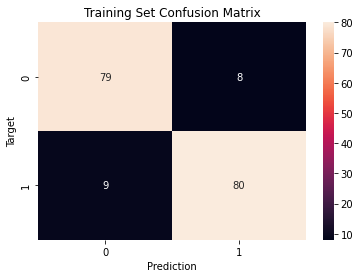

In [27]:
# Get the confusion matrix from predicted labels and actual labels

from sklearn.metrics import confusion_matrix

train_cf = confusion_matrix(y_train, train_pred)
plt.figure()
sns.heatmap(train_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Set Confusion Matrix');

In [28]:
# evaluation of the model using confusion matrix

train_TP= train_cf[1,1] # true positive
train_TN= train_cf[0,0] # true negative
train_FP= train_cf[1,0] # False positive
train_FN= train_cf[0,1] # false negative

print(f'TP: {train_TP}, TN: {train_TN}, FP: {train_FP}, FN: {train_FN}')

TP: 80, TN: 79, FP: 9, FN: 8


In [29]:
# determine the evaluation metrics

train_Accuracy = (train_TP+train_TN)/(train_TP+train_TN+train_FN+train_FP)
train_Sensitivity = train_TP / (train_TP + train_FN)
train_Specificity = train_TN / (train_TN + train_FP)
train_Precision = train_TP / (train_TP + train_FP)
train_Recall = train_TP / (train_TP + train_FN)

# create a dictionary for the evaluation metrics
train_evaluation_dic = [{'Accuracy': train_Accuracy, 'Sensitivity': train_Sensitivity, 'Specificity': train_Specificity,
                  'Precision': train_Precision, 'Recall': train_Recall}]
train_evaluation_df = pd.DataFrame.from_dict(train_evaluation_dic) # convert dictionary to dataframe
train_evaluation_df

Accuracy  Sensitivity  Specificity  Precision    Recall
0  0.903409     0.909091     0.897727   0.898876  0.909091

#### Calculate AUC for Logistic Regression Model

One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.” The closer the AUC is to 1, the better the model.

In [30]:
# Calculate AUC

#use model to predict probability that given y value is 1
y_pred_proba = log_model.predict_proba(X_train_scaled)[::,1]

#calculate AUC of model
from sklearn import metrics
train_auc = metrics.roc_auc_score(y_train, y_pred_proba)

#print AUC score
print("Training AUC: ", train_auc)

Training AUC:  0.9622885186620173


The AUC (area under curve) for this model is 0.962. A model with AUC score closer to 1 is considered good at classifying observations into the correct classes.

#### Validation Set



In [31]:
# making prediction of the train label on the validation set using LogisticRegression Classifier 

val_pred = log_model.predict(X_val_scaled)

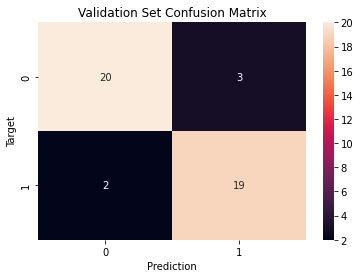

In [32]:
# Get the confusion matrix from the predicted validation labels and actual labels

val_cf = confusion_matrix(y_val, val_pred)
plt.figure()
sns.heatmap(val_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Validation Set Confusion Matrix');

In [33]:
# evaluation of the model using confusion matrix

val_TP= val_cf[1,1] # true positive
val_TN= val_cf[0,0] # true negative
val_FP= val_cf[1,0] # False positive
val_FN= val_cf[0,1] # false negative

# determine the evaluation metrics

val_Accuracy = (val_TP+val_TN)/(val_TP+val_TN+val_FN+val_FP)
val_Sensitivity = val_TP / (val_TP + val_FN)
val_Specificity = val_TN / (val_TN + val_FP)
val_Precision = val_TP / (val_TP + val_FP)
val_Recall = val_TP / (val_TP + val_FN)

# create a dictionary for the evaluation metrics
val_evaluation_dic = [{'Accuracy': val_Accuracy, 'Sensitivity': val_Sensitivity, 'Specificity': val_Specificity,
                  'Precision': val_Precision, 'Recall': val_Recall}]
val_evaluation_df = pd.DataFrame.from_dict(val_evaluation_dic) # convert dictionary to dataframe
val_evaluation_df

Accuracy  Sensitivity  Specificity  Precision    Recall
0  0.886364     0.863636     0.909091   0.904762  0.863636

The accuracy score achieved on the validation set with Logistic Regression Classifier is 88.6%

In [34]:
# Calculate AUC for validating set

#use model to predict probability that given y value is 1
y_pred_proba = log_model.predict_proba(X_val_scaled)[::,1]

#calculate AUC of model
val_auc = metrics.roc_auc_score(y_val, y_pred_proba)

#print AUC score
print("Validation AUC: ", val_auc)

Validation AUC:  0.9627329192546584


### Random Forest Classifier

In [35]:
# training and fitting of model on train data

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier() # create an instance of RandomForestClassifier
rfc_model.fit(X_train_scaled, y_train) # fit classifier on train data and label

RandomForestClassifier()

In [36]:
# making prediction of the train label using RandomForestClassifier 

rfc_train_pred = rfc_model.predict(X_train_scaled)

In [37]:
# determine the accuracy of the model

from sklearn.metrics import accuracy_score

rfc_train_accuracy = accuracy_score(y_train, rfc_train_pred)
print("RF Training Accuracy: ", rfc_train_accuracy)

RF Training Accuracy:  1.0


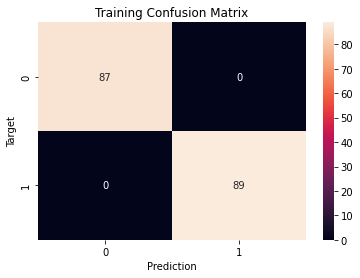

In [38]:
# Get the confusion matrix from predicted labels and actual labels

from sklearn.metrics import confusion_matrix

rfc_train_cf = confusion_matrix(y_train, rfc_train_pred)
plt.figure()
sns.heatmap(rfc_train_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix');

In [39]:
# evaluation of the model using confusion matrix

rfc_train_TP= rfc_train_cf[1,1] # true positive
rfc_train_TN= rfc_train_cf[0,0] # true negative
rfc_train_FP= rfc_train_cf[1,0] # False positive
rfc_train_FN= rfc_train_cf[0,1] # false negative

print(f'TP: {rfc_train_TP}, TN: {rfc_train_TN}, FP: {rfc_train_FP}, FN: {rfc_train_FN}')

TP: 89, TN: 87, FP: 0, FN: 0


In [40]:
# determine the evaluation metrics

rfc_train_Accuracy = (rfc_train_TP+rfc_train_TN)/(rfc_train_TP+rfc_train_TN+rfc_train_FN+rfc_train_FP)
rfc_train_Sensitivity = rfc_train_TP / (rfc_train_TP + rfc_train_FN)
rfc_train_Specificity = rfc_train_TN / (rfc_train_TN + rfc_train_FP)
rfc_train_Precision = rfc_train_TP / (rfc_train_TP + rfc_train_FP)
rfc_train_Recall = rfc_train_TP / (rfc_train_TP + rfc_train_FN)

# create a dictionary for the evaluation metrics
rfc_train_evaluation_dic = [{'Accuracy': rfc_train_Accuracy, 'Sensitivity': rfc_train_Sensitivity, 'Specificity': rfc_train_Specificity,
                  'Precision': rfc_train_Precision, 'Recall': rfc_train_Recall}]
rfc_train_evaluation_df = pd.DataFrame.from_dict(rfc_train_evaluation_dic) # convert dictionary to dataframe
rfc_train_evaluation_df

Accuracy  Sensitivity  Specificity  Precision  Recall
0       1.0          1.0          1.0        1.0     1.0

In [41]:
# Calculate AUC

#use model to predict probability that given y value is 1
y_pred_proba = rfc_model.predict_proba(X_train_scaled)[::,1]

#calculate AUC of model
from sklearn import metrics
rfc_train_auc = metrics.roc_auc_score(y_train, y_pred_proba)

#print AUC score
print(rfc_train_auc)

1.0


The AUC (area under curve) for the random forest classifier model is 1.0. A model with AUC score closer of 1 is considered excellent at classifying observations into the correct classes.

#### Validation Set

In [42]:
# making prediction of the validation label using RandomForestClassifier 

rfc_val_pred = rfc_model.predict(X_val_scaled)

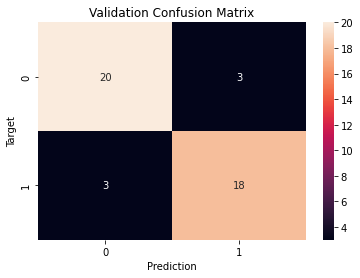

In [43]:
# Get the confusion matrix from predicted validation labels and actual labels

rfc_val_cf = confusion_matrix(y_val, rfc_val_pred)
plt.figure()
sns.heatmap(rfc_val_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Validation Confusion Matrix');

In [44]:
# evaluation of the model using confusion matrix

rfc_val_TP= rfc_val_cf[1,1] # true positive
rfc_val_TN= rfc_val_cf[0,0] # true negative
rfc_val_FP= rfc_val_cf[1,0] # False positive
rfc_val_FN= rfc_val_cf[0,1] # false negative

# determine the evaluation metrics

rfc_val_Accuracy = (rfc_val_TP+rfc_val_TN)/(rfc_val_TP+rfc_val_TN+rfc_val_FN+rfc_val_FP)
rfc_val_Sensitivity = rfc_val_TP / (rfc_val_TP + rfc_val_FN)
rfc_val_Specificity = rfc_val_TN / (rfc_val_TN + rfc_val_FP)
rfc_val_Precision = rfc_val_TP / (rfc_val_TP + rfc_val_FP)
rfc_val_Recall = rfc_val_TP / (rfc_val_TP + rfc_val_FN)

# create a dictionary for the evaluation metrics
rfc_val_evaluation_dic = [{'Accuracy': rfc_val_Accuracy, 'Sensitivity': rfc_val_Sensitivity, 'Specificity': rfc_val_Specificity,
                  'Precision': rfc_val_Precision, 'Recall': rfc_val_Recall}]
rfc_val_evaluation_df = pd.DataFrame.from_dict(rfc_val_evaluation_dic) # convert dictionary to dataframe
rfc_val_evaluation_df

Accuracy  Sensitivity  Specificity  Precision    Recall
0  0.863636     0.857143     0.869565   0.857143  0.857143

The accuracy score achieved on the validation set with Random Forest Classifier is 86.4%

In [45]:
# Calculate AUC

#use model to predict probability that given y value is 1
y_pred_proba = rfc_model.predict_proba(X_val_scaled)[::,1]

#calculate AUC of model
from sklearn import metrics
rfc_val_auc = metrics.roc_auc_score(y_val, y_pred_proba)

#print AUC score
print(rfc_val_auc)

0.9503105590062112


### Feature Importance

Random Forest Classifier can be used to obtain the importance of features used in training the model. This involves the ranking of training features based on the order of significance.

In [46]:
importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rfc_model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

feature  importance
3      LHIPPOC    0.116683
8     RMIDTEMP    0.112295
9     LINFTEMP    0.107903
14   RENTORHIN    0.097793
13   LENTORHIN    0.092074
5   LINFLATVEN    0.084098
7     LMIDTEMP    0.075117
11   LFUSIFORM    0.063134
4      RHIPPOC    0.061908
10    RINFTEMP    0.043448
12   RFUSIFORM    0.035889
6   RINFLATVEN    0.034101
0        BRAIN    0.028622
2   VENTRICLES    0.023507
1         EICV    0.023427

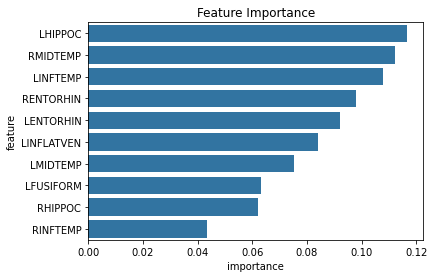

In [47]:
# plot the graph of the top ten features

plt.title('Feature Importance')

bcolor = sns.color_palette()[0]
sns.barplot(data=importance_df.head(10), x='importance', y='feature', color=bcolor);

It can be seen from the chart that LHIPPOC (Left Hippocampus) is the most important feature in the model while EICV is the least important feature. 

<a id='model_imp'></a>
## Model Improvement

The accuracy of the two classifiers model can be improved. For the purpose of this project, we are going be to be using two approaches to improve our model, these are:

- Feature Selection
- Hyperparameter Tuning

## Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

> ### Filter-Based Feature Selection Method

> - The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable.
> - First, the statistics or each input variable is calculated. Then features are selected according to the k highest scores.
> - The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

In [48]:
X.shape[1]

15

In [49]:
'''
There are total of 15 features, we will feed the SelectKBest the features from 1 to 15 to see the K-value with that
will give the highest accuracy
'''

# import required library
from sklearn.feature_selection import SelectKBest, f_classif

# create empty lists for the metrics
acc = []
sens = []
spec = []

# loop through the number of features to obtain value for k
for i in range(1, X.shape[1]+1):
    
    # define selection and fit to data then transform
    feat_sel = SelectKBest(score_func=f_classif, k=i)
    input_selected = feat_sel.fit_transform(X, y)
    
    # Get a mask, or integer index, of the features selected.
    cols_idxs = feat_sel.get_support(indices=True)
    selected_feats = X.iloc[:,cols_idxs].columns
    
    # create the Logistic Regression Classifier
    log_clf = LogisticRegression()
    
    # Fit the classifier to the training data and training labels
    log_clf.fit(X_train_scaled[selected_feats], y_train)
    
    # Use the trained classifier to predict the labels of the validation set
    target_pred = log_clf.predict(X_val_scaled[selected_feats])
    
    # Get the confusion matrix from predicted labels and actual labels
    log_clf_matrix = confusion_matrix(y_val, target_pred)
    
    # evaluation of the model using confusion matrix

    TP= log_clf_matrix[1,1]
    TN= log_clf_matrix[0,0]
    FP= log_clf_matrix[1,0]
    FN= log_clf_matrix[0,1]
    
    Accuracy = (TP+TN)/(TP+TN+FN+FP)
    Sensitivity = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    
    # append the metrics to the empty list created earlier

    acc.append(Accuracy)
    sens.append(Sensitivity)
    spec.append(Specificity)
    
feat_selected_dic = {'num_features': list(range(1, X.shape[1]+1)),
                    'accuracy': acc, 'sensitivity': sens, 'specificity': spec} 
feat_selected_df = pd.DataFrame.from_dict(feat_selected_dic)
feat_selected_df

num_features  accuracy  sensitivity  specificity
0              1  0.772727     0.789474     0.760000
1              2  0.863636     0.826087     0.904762
2              3  0.818182     0.782609     0.857143
3              4  0.863636     0.800000     0.947368
4              5  0.863636     0.857143     0.869565
5              6  0.863636     0.826087     0.904762
6              7  0.863636     0.826087     0.904762
7              8  0.863636     0.826087     0.904762
8              9  0.863636     0.826087     0.904762
9             10  0.863636     0.826087     0.904762
10            11  0.863636     0.826087     0.904762
11            12  0.863636     0.826087     0.904762
12            13  0.886364     0.863636     0.909091
13            14  0.886364     0.863636     0.909091
14            15  0.886364     0.863636     0.909091

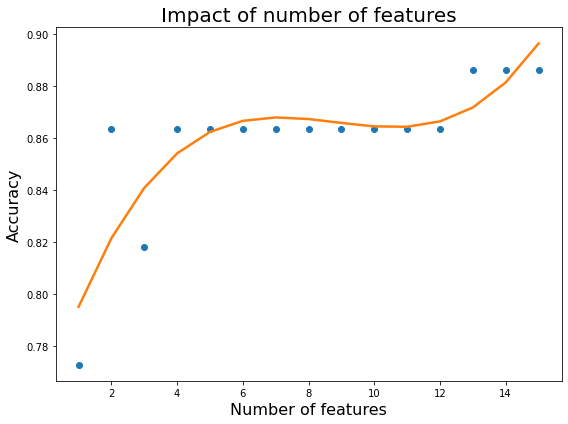

In [50]:
x= feat_selected_df.num_features
y= feat_selected_df.accuracy

plt.figure(figsize=(8,6))
p = np.poly1d(np.polyfit(x, y, 3))
t = feat_selected_df.num_features

plt.plot(x, y, 'o', t, p(t), '-', lw=2.5)
plt.title('Impact of number of features', fontsize=20)
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()

It is obvious that feature selection does not have any improvement on the model performance. This could mean that all the features have contributing effect on the performance of the model. 

### Hyperparameter Tuning 

Hyperparameters are some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance.

> ### Logistic Regression Classifier

> For logistic regression classifier, the main hyperparameter we will be tuning are solver and regularization strength

> #### 1. C - Inverse regularization strength

In [51]:
# write a function to generate training and testing error for different values of c (from 0.1 to 1.0)

def get_c(C):
    model = LogisticRegression(C=C)
    model.fit(X_train_scaled, y_train)
    train_acc = 1 - model.score(X_train_scaled, y_train)
    Validating_acc = 1 - model.score(X_val_scaled, y_val)
    return {'C': C, 'Training Error': train_acc, 'Validating Error': Validating_acc}

In [52]:
# create a dataframe of the training and testing error

errors_df = pd.DataFrame([get_c(C) for C in np.arange(0.1, 1.1, 0.1)])
errors_df

C  Training Error  Validating Error
0  0.1        0.125000          0.090909
1  0.2        0.119318          0.113636
2  0.3        0.119318          0.113636
3  0.4        0.119318          0.113636
4  0.5        0.107955          0.113636
5  0.6        0.102273          0.113636
6  0.7        0.102273          0.113636
7  0.8        0.096591          0.113636
8  0.9        0.096591          0.113636
9  1.0        0.096591          0.113636

From the table above, regularization strength of **0.1** results in the least validating error.

In [53]:
# train the model setting the regularization strength to 0.1

model = LogisticRegression(C=0.1)
model.fit(X_train_scaled, y_train)

# making prediction of the val label
pred = model.predict(X_val_scaled)

# determine accuracy for the tuned model
tune_accuracy = accuracy_score(y_val, pred)


print(f'Untuned Accuracy = {val_Accuracy} \nTuned Accuracy: {tune_accuracy}')

Untuned Accuracy = 0.8863636363636364 
Tuned Accuracy: 0.9090909090909091


It can be derived from the result above that the accuracy of the model is increased after tuning the reularization strength

#### 2. Solver 

Algorithm to use in the optimization problem. The default solver is **lbfgs**. Other Solvers include **liblinear, sag, saga, and newton-cg.**.

We will tune our parameter to see how the different solvers can improve our model.

In [54]:
# write a function to generate training and validating error for different solvers

def get_solver(solver):
    model = LogisticRegression(solver=solver)
    model.fit(X_train_scaled, y_train)
    train_acc = 1 - model.score(X_train_scaled, y_train)
    val_acc = 1 - model.score(X_val_scaled, y_val)
    return {'solver': solver, 'Training Error': train_acc, 'validating Error': val_acc}

In [55]:
# create the dataframe for the solvers

solvers = ['liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs']
errors_df = pd.DataFrame([get_solver(solver) for solver in solvers])
errors_df

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



solver  Training Error  validating Error
0  liblinear        0.096591          0.113636
1        sag        0.096591          0.113636
2       saga        0.096591          0.113636
3  newton-cg        0.096591          0.113636
4      lbfgs        0.096591          0.113636

It can be seen that all solvers results in same testing error. Therefore, the solver will have no effect in tuning our model.

### Hyperparameter Tuning -  Random Forest Classifier

Hyperparameter that can be tuned for a random forest classifier include:

- max_depth
- max_features
- n_estimators
- min_samples_split
- min_samples_leaf; and so on

In [56]:
rfc_model = RandomForestClassifier(random_state=42, 
                               n_jobs=-1, 
                               max_depth=20, 
                               max_leaf_nodes=2**12, 
                               n_estimators=50)
rfc_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=4096, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [57]:
# making prediction of the test label using RandomForest Classifier 
pred = rfc_model.predict(X_val_scaled)

# Get the confusion metrix from predicted labels and actual labels
cf = confusion_matrix(y_val, pred)

# evaluation of the model using confusion matrix

TP= cf[1,1] # true positive
TN= cf[0,0] # true negative
FP= cf[1,0] # False positive
FN= cf[0,1] # false negative

# determine the evaluation metrics

rfc_t_accuracy = (TP+TN)/(TP+TN+FN+FP)
rfc_t_sensitivity = TP / (TP + FN)
rfc_t_specificity = TN / (TN + FP)
rfc_t_precision = TP / (TP + FP)
rfc_t_recall = TP / (TP + FN)

''' Calculate AUC '''

#use model to predict probability that given y value is 1
y_pred_proba = rfc_model.predict_proba(X_val_scaled)[::,1]

#calculate AUC of model
rfc_t_auc = metrics.roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {rfc_t_accuracy}\nSensitivity: {rfc_t_sensitivity}\nSpecificity: {rfc_t_specificity}\nPrecision: {rfc_t_precision}\nRecall: {rfc_t_recall}\nAUC: {rfc_t_auc}')

Accuracy: 0.8863636363636364
Sensitivity: 0.9
Specificity: 0.875
Precision: 0.8571428571428571
Recall: 0.9
AUC: 0.9523809523809524


**We observed an fair improvement in the accuracy of the model from 86.4% to 88.6%**

<a id='final model'></a>
## Putting it all together

### Train a Logistic Regression Classifier

In [58]:
# training and fitting of model on train data
lr_classifier = LogisticRegression(C=0.1) 
lr_classifier.fit(X_train_scaled, y_train)

# making prediction of the val label using LogisticRegression Classifier 
pred = lr_classifier.predict(X_val_scaled)

# Get the confusion metrix from predicted labels and actual labels
cf = confusion_matrix(y_val, pred)

# evaluation of the model using confusion matrix

TP= cf[1,1] # true positive
TN= cf[0,0] # true negative
FP= cf[1,0] # False positive
FN= cf[0,1] # false negative

# determine the evaluation metrics

lr_accuracy = (TP+TN)/(TP+TN+FN+FP)
lr_sensitivity = TP / (TP + FN)
lr_specificity = TN / (TN + FP)
lr_precision = TP / (TP + FP)
lr_recall = TP / (TP + FN)

''' Calculate AUC '''

#use model to predict probability that given y value is 1
y_pred_proba = lr_classifier.predict_proba(X_val_scaled)[::,1]

#calculate AUC of model
lr_auc = metrics.roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {lr_accuracy}\nSensitivity: {lr_sensitivity}\nSpecificity: {lr_specificity}\nPrecision: {lr_precision}\nRecall: {lr_recall}\nAUC: {lr_auc}')

Accuracy: 0.9090909090909091
Sensitivity: 0.9047619047619048
Specificity: 0.9130434782608695
Precision: 0.9047619047619048
Recall: 0.9047619047619048
AUC: 0.9648033126293996


### Train a Random Forest Classifier

In [59]:
# training and fitting of model on train data
rf_classifier = RandomForestClassifier(random_state=42, 
                               n_jobs=-1, 
                               max_depth=20, 
                               max_leaf_nodes=2**12, 
                               n_estimators=50) 
rf_classifier.fit(X_train_scaled, y_train)

# making prediction of the val label using RandomForest Classifier 
pred = rf_classifier.predict(X_val_scaled)

# Get the confusion metrix from predicted labels and actual labels
cf = confusion_matrix(y_val, pred)

# evaluation of the model using confusion matrix

TP= cf[1,1] # true positive
TN= cf[0,0] # true negative
FP= cf[1,0] # False positive
FN= cf[0,1] # false negative

# determine the evaluation metrics

rf_accuracy = (TP+TN)/(TP+TN+FN+FP)
rf_sensitivity = TP / (TP + FN)
rf_specificity = TN / (TN + FP)
rf_precision = TP / (TP + FP)
rf_recall = TP / (TP + FN)

''' Calculate AUC '''

#use model to predict probability that given y value is 1
y_pred_proba = rf_classifier.predict_proba(X_val_scaled)[::,1]

#calculate AUC of model
rf_auc = metrics.roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {rf_accuracy}\nSensitivity: {rf_sensitivity}\nSpecificity: {rf_specificity}\nPrecision: {rf_precision}\nRecall: {rf_recall}\nAUC: {rf_auc}')

Accuracy: 0.8863636363636364
Sensitivity: 0.9
Specificity: 0.875
Precision: 0.8571428571428571
Recall: 0.9
AUC: 0.9523809523809524


### Comparing the two models performance and also the effect of Hyperparameter Tuning

In [60]:
# create a list of dictionaries for the four models (with and without hyperparameter tuning)

models_perf = [{'Classifier': 'Logistic Regression', 'Hypertuning': 'Not tuned', 'Accuracy': val_Accuracy, 
                'Sensitivity': val_Sensitivity, 'Specificity': val_Specificity, 'Precision': val_Precision,
                'Recall': val_Recall, 'AUC': val_auc},
              {'Classifier': 'Logistic Regression', 'Hypertuning': 'Tuned', 'Accuracy': lr_accuracy, 
                'Sensitivity': lr_sensitivity, 'Specificity': lr_specificity, 'Precision': lr_precision,
                'Recall': lr_recall, 'AUC': lr_auc},
              {'Classifier': 'Random Forest', 'Hypertuning': 'Not tuned', 'Accuracy': rfc_val_Accuracy, 
                'Sensitivity': rfc_val_Sensitivity, 'Specificity': rfc_val_Specificity, 'Precision': rfc_val_Precision,
                'Recall': rfc_val_Recall, 'AUC': rfc_val_auc},
              {'Classifier': 'Random Forest', 'Hypertuning': 'Tuned', 'Accuracy': rf_accuracy, 
                'Sensitivity': rf_sensitivity, 'Specificity': rf_specificity, 'Precision': rf_precision,
                'Recall': rf_recall, 'AUC': rf_auc}]

models_perf_df = pd.DataFrame.from_dict(models_perf) # convert dictionary to dataframe
models_perf_df

Classifier Hypertuning  Accuracy  Sensitivity  Specificity  \
0  Logistic Regression   Not tuned  0.886364     0.863636     0.909091   
1  Logistic Regression       Tuned  0.909091     0.904762     0.913043   
2        Random Forest   Not tuned  0.863636     0.857143     0.869565   
3        Random Forest       Tuned  0.886364     0.900000     0.875000   

   Precision    Recall       AUC  
0   0.904762  0.863636  0.962733  
1   0.904762  0.904762  0.964803  
2   0.857143  0.857143  0.950311  
3   0.857143  0.900000  0.952381

Conclusively,

- The performance metrics of the two models revealed that Logistic Regression Classifier perform better on the validation sets than Random Forest Classifier.

- Therefore Logistic Regression (LR) Model is a better model for classifying AD and Normal patients.

- The LR model is tuned by reducing the regularization strength to 0.1 from 1.0 which is the default value. 0.1 is the regularization strength that produced the least validation error.